In [1]:
import pandas as pd
import matplotlib.pyplot as plt

PHOTOMETRY_CSV_PATH = "/home/ramon/uanl/Tesis/Backup Data/Gaia Epoch Photometry - Indiv/EPOCH_PHOTOMETRY-Gaia DR3 1982536257931470464.csv"

import os
assert os.path.exists(PHOTOMETRY_CSV_PATH)

In [10]:
def plotBand(source_id, vals, axsRow):
	BAND_COLORS = {
		'G': 'green',
		'BP': 'blue',
		'RP': 'red'
	}

	axsRow[0].set_title(f"{source_id} Magnitude")
	axsRow[1].set_title(f"{source_id} Flux")

	for band in BAND_COLORS:
		filteredBand = vals[vals['band'] == band]
		axsRow[0].plot(filteredBand['time'], filteredBand['mag'], '.-', label=f"{band}", color=BAND_COLORS[band])
		axsRow[1].plot(filteredBand['time'], filteredBand['flux'], '.-', label=f"{band}", color=BAND_COLORS[band])
		
		axsRow[0].set_xlabel("BJD - 2455197.5 Days")
		axsRow[1].set_xlabel("BJD - 2455197.5 Days")
	
	axsRow[0].legend()

[1982536257931470464]


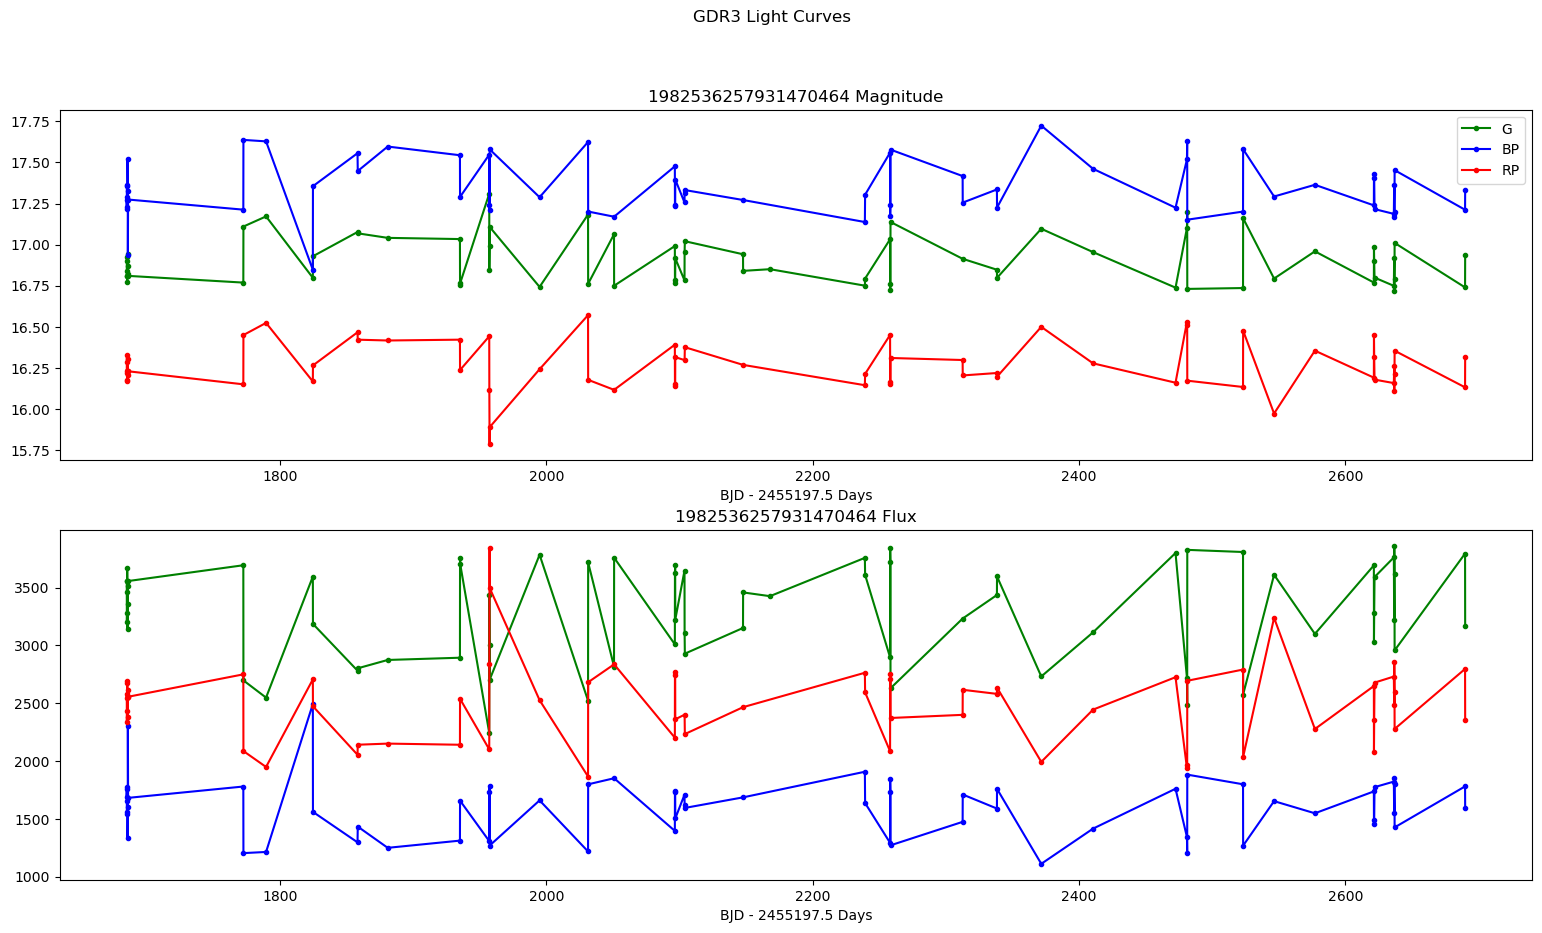

In [11]:
%matplotlib inline

df = pd.read_csv(PHOTOMETRY_CSV_PATH)
df = df[df['rejected_by_photometry'] == False]

source_ids = df['source_id'].unique()
print(source_ids)

sourceIdCount = len(source_ids)

fig, axs = plt.subplots(2, sourceIdCount, figsize=(19, 10))
fig.suptitle(f"GDR3 Light Curves")

for i in range(sourceIdCount):
	source_id = source_ids[i]

	axsRow: None
	if sourceIdCount > 1:
		axsRow = axs[i]
	else:
		axsRow = axs
	sourceVals = df[df['source_id'] == source_ids[i]]
	plotBand(source_id, sourceVals, axsRow)

plt.show()